In [4]:
# importing pandas, numpy, matplotlib,seaborn,load_boston,train_test_split,linearRegression,mean_squared_error,r2_score,mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [7]:
# getting the url for boston dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
# quick overview of the dataset and its shape
df.shape
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [9]:
# checking the null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

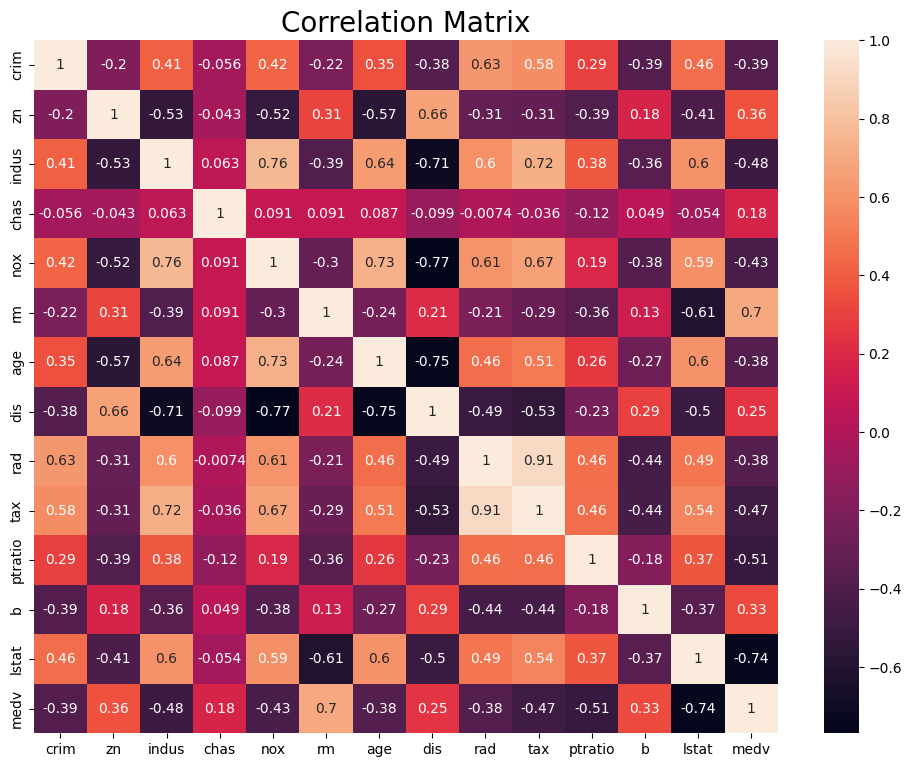

In [10]:
# feature correlation matrix with figure size 12x9
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix",fontsize=20)
plt.show()

In [11]:
# spliting features and target variables
x = df.drop("medv",axis=1)
y = df["medv"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [12]:
# training the model
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred = model.predict(X_test)

In [14]:
# evaluating the model
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score:",r2_score(y_test,y_pred))

Mean Absolute Error: 3.189091965887837
Mean Squared Error: 24.291119474973478
Root Mean Squared Error: 4.928602182665332
R2 score: 0.6687594935356326


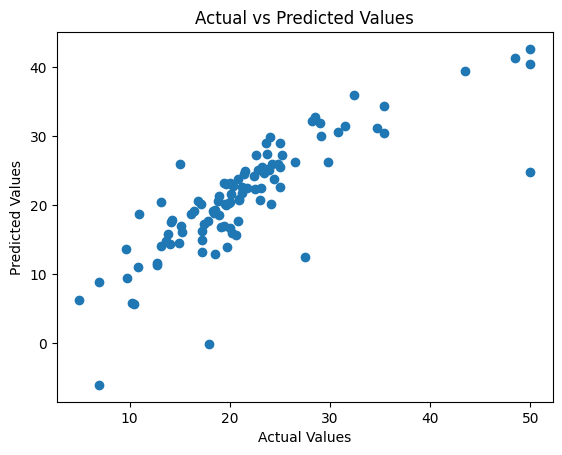

In [15]:
# visualization predicted vs actual values
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


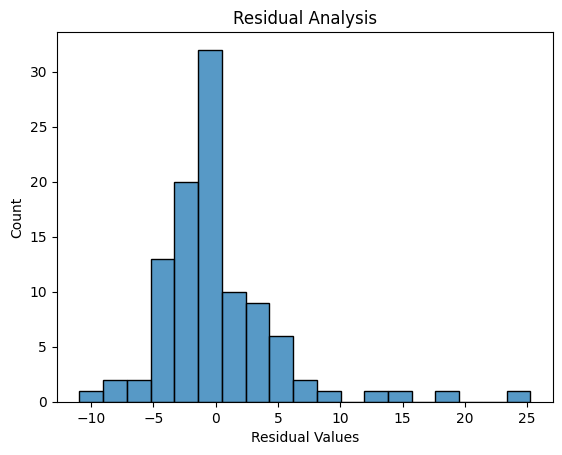

In [16]:
# residual analysis
sns.histplot(y_test-y_pred)
plt.title("Residual Analysis")
plt.xlabel("Residual Values")
plt.show()

In [18]:
# feature importance
feature_importance = pd.DataFrame(model.coef_,index=x.columns,columns=["Importance"]).sort_values("Importance",ascending=False)
feature_importance

,Importance
rm,4.438835
chas,2.784438
rad,0.262430
indus,0.040381
zn,0.030110
b,0.012351
age,-0.006296
tax,-0.010647
crim,-0.113056
lstat,-0.508571


In [19]:
# using RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("R2 score:",r2_score(y_test,y_pred))
feature_importance = pd.DataFrame(model.feature_importances_,index=x.columns,columns=["Importance"]).sort_values("Importance",ascending=False)
feature_importance

R2 score: 0.8795193806061901


,Importance
rm,0.465261
lstat,0.343855
dis,0.063193
crim,0.039140
tax,0.017409
nox,0.016797
ptratio,0.015031
age,0.014288
b,0.012202
indus,0.006590
